This model aims to predict the stock price of Coca Cola using economic timeseries variables and Support vector regression

Data Courtest: Yahoo FInance and FRED (Federal Reserve Bank of St. Louis)

Using the yfinance library to retrieve historical stock data for Coca-Cola (KO) and then resampling it to a quarterly frequency.

In [3]:
import yfinance as yf
from datetime import datetime

# Define the stock symbol (KO for Coca-Cola)
symbol = "KO"

# Create a Ticker object for Coca-Cola
ko = yf.Ticker(symbol)

# Define custom start date and end date
start_date = '2012-12-31'
end_date = datetime.today()

# Get daily data for the specified date range
data = ko.history(start=start_date, end=end_date, interval="3mo")

# Resample to quarterly frequency (end of quarter)
quarterly_data = data.resample('Q').last()

# Reset the index to make the 'Date' column a regular column
quarterly_data = quarterly_data.reset_index()

# Print the DataFrame with the 'Date' column
quarterly_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-12-31 00:00:00-05:00,26.386014,27.862603,26.050749,27.620071,627696600,0.00,0.0
1,2013-03-31 00:00:00-04:00,27.455999,30.979839,27.427466,28.525991,894424000,0.28,0.0
2,2013-06-30 00:00:00-04:00,28.703747,29.982662,27.158989,27.432016,863530400,0.28,0.0
3,2013-09-30 00:00:00-04:00,27.686743,29.574969,26.644964,29.075781,947889200,0.56,0.0
4,2013-12-31 00:00:00-05:00,29.426354,30.372988,27.070778,28.032089,975777300,0.00,0.0


 it will display the first few rows of the quarterly_data DataFrame containing the quarterly stock data for Coca-Cola.

In [4]:
quarterly_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-12-31 00:00:00-05:00,26.386014,27.862603,26.050749,27.620071,627696600,0.00,0.0
1,2013-03-31 00:00:00-04:00,27.455999,30.979839,27.427466,28.525991,894424000,0.28,0.0
2,2013-06-30 00:00:00-04:00,28.703747,29.982662,27.158989,27.432016,863530400,0.28,0.0
3,2013-09-30 00:00:00-04:00,27.686743,29.574969,26.644964,29.075781,947889200,0.56,0.0
4,2013-12-31 00:00:00-05:00,29.426354,30.372988,27.070778,28.032089,975777300,0.00,0.0


Using the to_csv method, you're exporting the quarterly_data DataFrame to a CSV file named coca_cola_time_series_data.csv

In [5]:
# export data to csv file
quarterly_data.to_csv('coca_cola_time_series_data.csv')

This code snippet fetches data for Consumer Spending from the FRED API and stores it in the consumer_spending DataFrame. If you run this code, you'll see the first few rows of the data.

In [6]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

# Define the series code for Consumer Spending (PCE)
series_code = 'PCE'

# Define the start and end dates for the past 10 years
# Define custom start date and end date
start_date = '2012-09-30'
end_date = datetime.today()

# Retrieve data from FRED API
consumer_spending = pdr.get_data_fred(series_code, start_date, end_date)

consumer_spending.head()

,PCE
DATE,
2012-10-01,11137.4
2012-11-01,11178.4
2012-12-01,11181.2
2013-01-01,11252.4
2013-02-01,11290.5


Fetches economic data from the FRED API for various indicators, resamples it to quarterly frequency, combines it into a single DataFrame, and then saves it to a CSV file.

In [7]:
import pandas_datareader as pdr
from datetime import datetime

# Define series codes and corresponding names
economic_data = [
    {'code': 'PCE', 'name': 'Consumer Spending'},
    {'code': 'GDPC1', 'name': 'GDP Growth'},
    {'code': 'CPIAUCNS', 'name': 'Inflation Rate'},
    {'code': 'GS10', 'name': 'Interest Rates'},
    {'code': 'UNRATE', 'name': 'Unemployment Rate'}
]

# Define the start and end dates for the past 10 years
start_date = '2012-09-30'
end_date = '2023-09-01'

# Initialize an empty DataFrame
combined_data = pd.DataFrame()

# Loop through the economic data list
for item in economic_data:
    # Retrieve data from FRED API
    data = pdr.get_data_fred(item['code'], start_date, end_date)
    
    # Resample data to quarterly frequency (taking the last value of each quarter)
    data = data.resample('Q').last()
    
    # Rename columns to include the economic indicator name
    data = data.rename(columns={'value': item['name']})
    
    # Merge data with existing combined_data DataFrame
    combined_data = pd.concat([combined_data, data], axis=1)

# Add the date column to the data
combined_data['Date'] = combined_data.index

combined_data.reset_index

# Save the combined data to a CSV file
combined_data.to_csv('economic_data_with_single_date_column_quarterly.csv', index=False)


Display Date column from quarterly_data

In [8]:
quarterly_data["Date"].head()

0   2012-12-31 00:00:00-05:00
1   2013-03-31 00:00:00-04:00
2   2013-06-30 00:00:00-04:00
3   2013-09-30 00:00:00-04:00
4   2013-12-31 00:00:00-05:00
Name: Date, dtype: datetime64[ns, America/New_York]

Using the apply method along with a lambda function to format the dates in the "Date" column of the quarterly_data DataFrame to a string format in the "mm-dd-yyyy" style.

In [9]:
quarterly_data['Date'] = quarterly_data['Date'].apply(lambda x: x.strftime("%m-%d-%Y"))

Display Date column from quarterly_data

In [10]:
quarterly_data["Date"].head()

0    12-31-2012
1    03-31-2013
2    06-30-2013
3    09-30-2013
4    12-31-2013
Name: Date, dtype: object

Using the apply method along with a lambda function to format the dates in the "Date" column of the combined_data DataFrame to a string format in the "mm-dd-yyyy" style.

In [11]:
combined_data['Date'] = combined_data['Date'].apply(lambda x: x.strftime("%m-%d-%Y"))

Display first 5 rows for the dataset combined_data

In [12]:
combined_data.head()

,PCE,GDPC1,CPIAUCNS,GS10,UNRATE,Date
DATE,,,,,,
2012-12-31,11181.2,17489.852,229.601,1.72,7.9,12-31-2012
2013-03-31,11290.1,17662.400,232.773,1.96,7.5,03-31-2013
2013-06-30,11344.4,17709.671,233.504,2.30,7.5,06-30-2013
2013-09-30,11445.9,17860.450,234.149,2.81,7.2,09-30-2013
2013-12-31,11593.2,18016.147,233.049,2.90,6.7,12-31-2013


Display first five rows for the dataset quarterly_data

In [13]:
quarterly_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,12-31-2012,26.386014,27.862603,26.050749,27.620071,627696600,0.00,0.0
1,03-31-2013,27.455999,30.979839,27.427466,28.525991,894424000,0.28,0.0
2,06-30-2013,28.703747,29.982662,27.158989,27.432016,863530400,0.28,0.0
3,09-30-2013,27.686743,29.574969,26.644964,29.075781,947889200,0.56,0.0
4,12-31-2013,29.426354,30.372988,27.070778,28.032089,975777300,0.00,0.0


merged two DataFrames (quarterly_data and combined_data) based on the "Date" column using an inner join.

In [14]:
merged_df = pd.merge(quarterly_data, combined_data, on="Date", how="inner")

# Print the merged DataFrame
merged_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,PCE,GDPC1,CPIAUCNS,GS10,UNRATE
0,12-31-2012,26.386014,27.862603,26.050749,27.620071,627696600,0.00,0.0,11181.2,17489.852,229.601,1.72,7.9
1,03-31-2013,27.455999,30.979839,27.427466,28.525991,894424000,0.28,0.0,11290.1,17662.400,232.773,1.96,7.5
2,06-30-2013,28.703747,29.982662,27.158989,27.432016,863530400,0.28,0.0,11344.4,17709.671,233.504,2.30,7.5
3,09-30-2013,27.686743,29.574969,26.644964,29.075781,947889200,0.56,0.0,11445.9,17860.450,234.149,2.81,7.2
4,12-31-2013,29.426354,30.372988,27.070778,28.032089,975777300,0.00,0.0,11593.2,18016.147,233.049,2.90,6.7


Dropping the following redundant columns from the merged_df

In [15]:
merged_df = merged_df.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])

Display first 5 rows of merged_df

In [16]:
merged_df.head()

,Date,Close,PCE,GDPC1,CPIAUCNS,GS10,UNRATE
0,12-31-2012,27.620071,11181.2,17489.852,229.601,1.72,7.9
1,03-31-2013,28.525991,11290.1,17662.400,232.773,1.96,7.5
2,06-30-2013,27.432016,11344.4,17709.671,233.504,2.30,7.5
3,09-30-2013,29.075781,11445.9,17860.450,234.149,2.81,7.2
4,12-31-2013,28.032089,11593.2,18016.147,233.049,2.90,6.7


Export merged_df to csv file

In [17]:
merged_df.to_csv("combined quarterly data for regression.csv")

building a Support Vector Regression (SVR) model to predict the 'Close' values based on the independent variables 'PCE', 'GDPC1', 'CPIAUCNS', 'GS10', and 'UNRATE'. 

In [30]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'df' is your DataFrame containing the data
X = merged_df[['PCE', 'GDPC1', 'CPIAUCNS', 'GS10', 'UNRATE']]  # Independent variables
y = merged_df['Close']  # Dependent variable

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVR model
svr_model = SVR(kernel='rbf', C=3.0, epsilon=0.1)

# Fit the model
svr_model.fit(X_train, y_train)

# Predict 'Close' values
y_pred = svr_model.predict(X_test)

# Calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 3.3817975886369123
Root Mean Squared Error (RMSE): 4.376125179007286


The above metrics provide an indication of how well your model is performing. In this context:

    MAE represents the average absolute difference between the predicted and actual 'Close' values. A lower MAE indicates better performance.

    RMSE measures the square root of the average of the squared differences between predicted and actual 'Close' values. A lower RMSE also indicates better performance.

This code will generate a scatter plot comparing the actual 'Close' prices (y_test) with the predicted 'Close' prices (y_pred). 

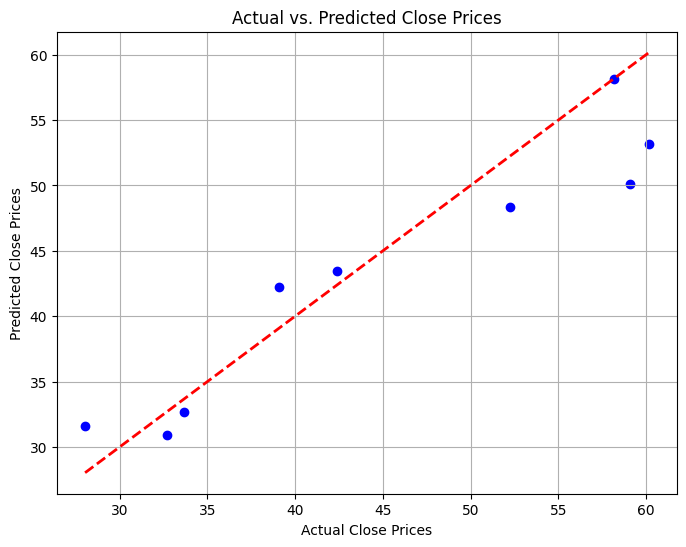

In [28]:
import matplotlib.pyplot as plt

# Assuming 'y_test' contains actual 'Close' prices and 'y_pred' contains predicted 'Close' prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.title('Actual vs. Predicted Close Prices')
plt.grid(True)
plt.show()


The resulting plot shows a scatter of points representing actual vs. predicted 'Close' prices, and a diagonal dashed line representing perfect prediction. 

Pros:

    1. Handles Non-Linearity: SVR is capable of modeling complex, non-linear relationships between the independent and dependent variables.

    2. Effective in High-Dimensional Spaces: SVR can be effective even when the number of features is greater than the number of samples, making it suitable for high-dimensional data.

    3. Robust to Outliers: SVR is less sensitive to outliers in the data compared to some other regression techniques.

    4. Flexibility in Kernels: SVR allows the use of different kernel functions (e.g., linear, polynomial, radial basis function) to better capture underlying patterns in the data.

Cons:

    1. Computationally Intensive: Training an SVR model can be computationally expensive, especially with large datasets. It may require more time and resources compared to simpler models.

    2. Sensitive to Kernel Choice: The choice of kernel and associated hyperparameters can significantly impact model performance. It may require experimentation and tuning.

    3. Limited Scalability: SVR may not be the best choice for very large datasets due to its computational demands.

    4. Potential Overfitting: Without proper hyperparameter tuning, SVR can be prone to overfitting, especially if the kernel is too complex.

    5. Requires Feature Scaling: SVR is sensitive to the scale of features. It's important to standardize or normalize the features before fitting the model.